In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics.cluster import contingency_matrix

In [65]:
# Configuration to automatically reload modified modules
%load_ext autoreload
%autoreload 2

# This allows changes in imported modules to be reflected automatically
# without needing to restart the kernel

# Load Gold Standard Corpus

In [70]:
gold_corpus = pd.read_csv("../Task_3/data/corpus_raw.csv")

# Build ground-truth dictionary for BCubed
ldict = {i: {str(label)} for i, label in enumerate(gold_corpus["category"])}

# Load Vector Space Model

In [26]:
import os
import sys


# Add the Task_3 directory to the Python path
sys.path.append(os.path.join(os.getcwd(), "../Task_3"))
from vectorizing import load_vectors_scipy

## Load TF (BoW) vectors

In [29]:
tf_vectors, tf_vocab = load_vectors_scipy("../Task_3/data/VSM/tf_vectors")

### K-Means clustering

In [108]:
from clustering import kmeans_pipeline

In [109]:
cluster_labels = kmeans_pipeline(tf_vectors)

cdict = {i: {str(label)} for i, label in enumerate(cluster_labels)}

/Users/thedandy/Desktop/Master_IA_codigos/text-mining/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


#### Evaluation

##### Bcubed metric

In [77]:
from cluster_evaluation import bcubed_evaluation

In [174]:
precision, recall, fscore = bcubed_evaluation(ldict, cdict)

print(f"BCubed Precision: {precision:.3f}")
print(f"BCubed Recall: {recall:.3f}")
print(f"BCubed F-score: {fscore:.3f}")

BCubed Precision: 0.230
BCubed Recall: 0.206
BCubed F-score: 0.217


##### ARI (Adjusted Rand Index)

In [175]:
from cluster_evaluation import ari_evaluation


print("ARI: ", ari_evaluation(gold_corpus["category"], cluster_labels))

ARI:  0.05371104833323774


##### Confussion Matrix

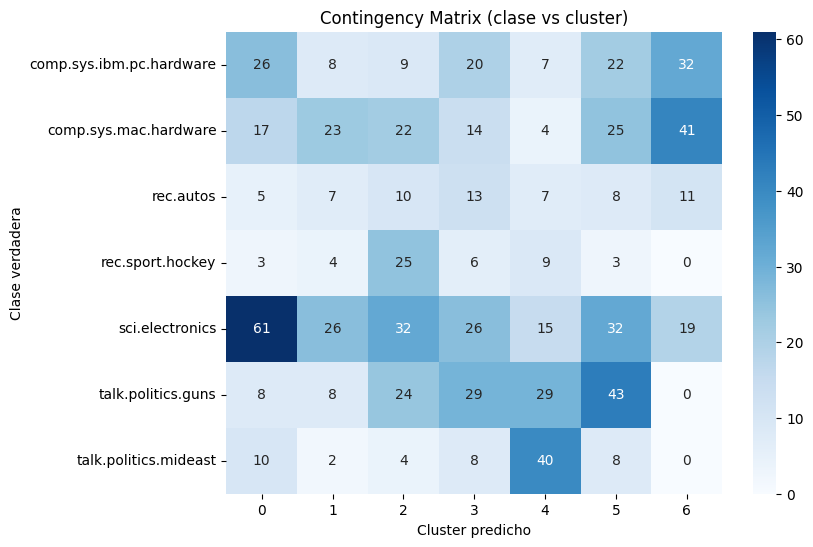

In [173]:
# y_true: real classes (strings)
# y_pred: cluster ids (integers)
y_true = gold_corpus["category"].values
C = contingency_matrix(y_true, cluster_labels)

yticks = np.unique(y_true)
xticks = np.unique(cluster_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(C, annot=True, fmt="d", cmap="Blues", yticklabels=yticks, xticklabels=xticks)
plt.xlabel("Cluster predicho")
plt.ylabel("Clase verdadera")
plt.title("Contingency Matrix (clase vs cluster)")
plt.show()

### --- clustering

### K-Means clustering

### --- clustering

# Load Semantic Space Model

## Load Additive Embeddings

## Load Average Embeddings